# Working with Time Series Data Exercises

For all of the datasets below, examine the data types of each column, ensure that the dates are in the proper format, and set the dataframe's index to the date column as appropriate.

For this exercise you'll need to install a library that will provide us access to some more datasets:

> `pip install vega_datasets`

You can use this library like so:

> `from vega_datasets import data
data.sf_temps()`

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from vega_datasets import data

## SF Temps

In [2]:
df = data.sf_temps()

In [3]:
# Check to see if we need to parse dates - in this case we do not
df.dtypes

temp           float64
date    datetime64[ns]
dtype: object

In [4]:
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [5]:
# Set index to datetime index
df = df.set_index('date')
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


#### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

<AxesSubplot:title={'center':'Average Daily Temperature'}, xlabel='date'>

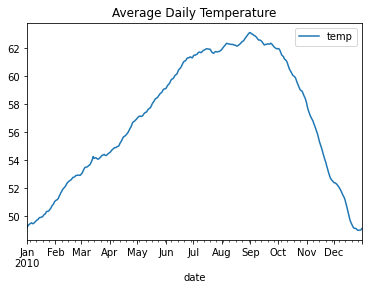

In [6]:
df.resample('D').mean().plot(title='Average Daily Temperature')

#### 2. Write the code necessary to visualize the minimum temperature over time.

<AxesSubplot:title={'center':'Minimum Daily Temperature'}, xlabel='date'>

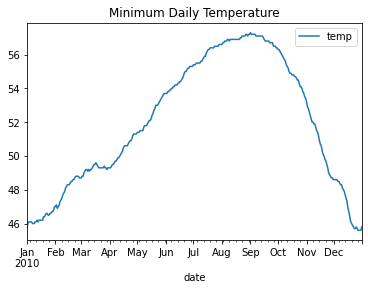

In [7]:
df.resample('D').min().plot(title='Minimum Daily Temperature')

#### 3. Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:title={'center':'Maximum Daily Temperature'}, xlabel='date'>

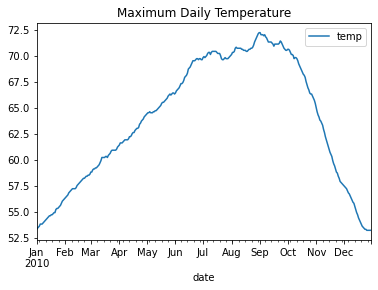

In [8]:
df.resample('D').max().plot(title='Maximum Daily Temperature')

#### 4. Which month is the coldest? 

#### 5. Which month has the highest average temperature?

In [9]:
df['month'] = df.index.strftime('%m-%b')

In [10]:
df.head()

,temp,month
date,,
2010-01-01 00:00:00,47.8,01-Jan
2010-01-01 01:00:00,47.4,01-Jan
2010-01-01 02:00:00,46.9,01-Jan
2010-01-01 03:00:00,46.5,01-Jan
2010-01-01 04:00:00,46.0,01-Jan


In [11]:
df.month.value_counts()

07-Jul    744
01-Jan    744
05-May    744
12-Dec    744
10-Oct    744
08-Aug    744
03-Mar    743
11-Nov    720
09-Sep    720
06-Jun    720
04-Apr    720
02-Feb    672
Name: month, dtype: int64

In [12]:
df.groupby('month').temp.mean().sort_values()

month
01-Jan    49.984140
12-Dec    50.498253
02-Feb    52.243899
03-Mar    53.956528
11-Nov    55.185139
04-Apr    55.633056
05-May    57.970968
10-Oct    60.253091
06-Jun    60.444722
07-Jul    61.765457
08-Aug    62.405376
09-Sep    62.487083
Name: temp, dtype: float64

#### 6. Resample by the day and calculate the min and max temp for the day (Hint: `.agg(['min', 'max'])`). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [13]:
# change in temp by day
daily = df.resample('D').temp.agg(['min', 'max'])

In [14]:
daily

,min,max
date,,
2010-01-01,45.8,53.3
2010-01-02,46.0,53.4
2010-01-03,46.1,53.5
2010-01-04,46.1,53.6
2010-01-05,46.1,53.8
...,...,...
2010-12-27,45.6,53.2
2010-12-28,45.6,53.2
2010-12-29,45.6,53.2


In [15]:
daily['temp_change'] = daily['max'] - daily['min']
daily

,min,max,temp_change
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7
...,...,...,...
2010-12-27,45.6,53.2,7.6
2010-12-28,45.6,53.2,7.6
2010-12-29,45.6,53.2,7.6


In [16]:
daily['month'] = daily.index.strftime('%m-%b')
daily.head()

,min,max,temp_change,month
date,,,,
2010-01-01,45.8,53.3,7.5,01-Jan
2010-01-02,46.0,53.4,7.4,01-Jan
2010-01-03,46.1,53.5,7.4,01-Jan
2010-01-04,46.1,53.6,7.5,01-Jan
2010-01-05,46.1,53.8,7.7,01-Jan


In [17]:
# We can sort values to find highest daily variability
daily.groupby('month').temp_change.max().sort_values().tail()

month
10-Oct    14.4
06-Jun    14.8
07-Jul    14.8
09-Sep    14.9
08-Aug    15.0
Name: temp_change, dtype: float64

#### Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [18]:
df.resample('D').temp.agg(['min', 'mean', 'max']).head()

,min,mean,max
date,,,
2010-01-01,45.8,49.170833,53.3
2010-01-02,46.0,49.304167,53.4
2010-01-03,46.1,49.391667,53.5
2010-01-04,46.1,49.445833,53.6
2010-01-05,46.1,49.491667,53.8


<AxesSubplot:xlabel='date'>

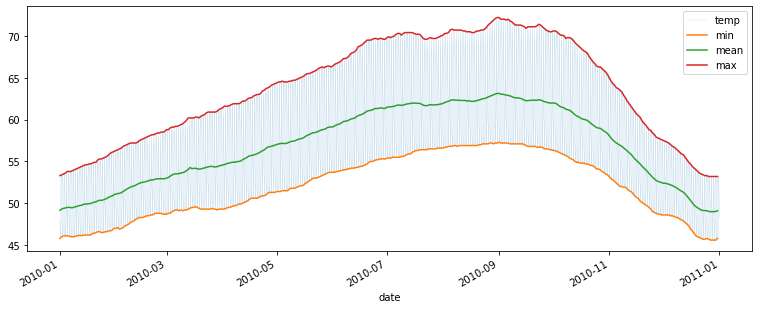

In [19]:
ax = df.plot(alpha=.5, figsize=(13, 5), lw=.2)
df.resample('D').temp.agg(['min', 'mean', 'max']).plot(ax=ax)

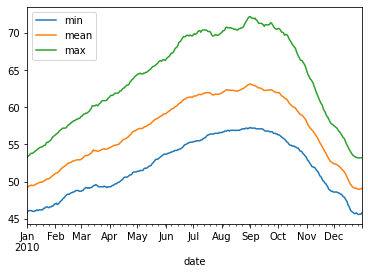

In [20]:
df.resample('D').temp.agg(['min', 'mean', 'max'])['min'].plot(label = 'min')
df.resample('D').temp.agg(['min', 'mean', 'max'])['mean'].plot(label = 'mean')
df.resample('D').temp.agg(['min', 'mean', 'max'])['max'].plot(label = 'max')
plt.legend()

In [21]:
daily = df.resample('D').temp.agg(['min', 'mean', 'max'])
daily.head()

,min,mean,max
date,,,
2010-01-01,45.8,49.170833,53.3
2010-01-02,46.0,49.304167,53.4
2010-01-03,46.1,49.391667,53.5
2010-01-04,46.1,49.445833,53.6
2010-01-05,46.1,49.491667,53.8


In [22]:
daily = daily.reset_index().melt(id_vars=['date'])
daily.head()

,date,variable,value
0,2010-01-01,min,45.8
1,2010-01-02,min,46.0
2,2010-01-03,min,46.1
3,2010-01-04,min,46.1
4,2010-01-05,min,46.1


<AxesSubplot:xlabel='date', ylabel='value'>

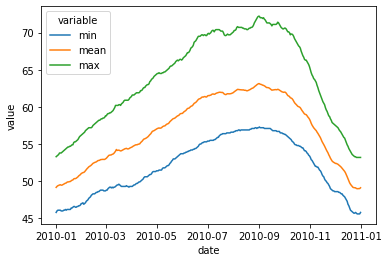

In [23]:
sns.lineplot(data=daily, x='date', y='value', hue='variable')

## Seattle Weather

### Which year and month combination has the highest amount of precipitation?

In [24]:
df.index.strftime('%m-%b')

Index(['01-Jan', '01-Jan', '01-Jan', '01-Jan', '01-Jan', '01-Jan', '01-Jan',
       '01-Jan', '01-Jan', '01-Jan',
       ...
       '12-Dec', '12-Dec', '12-Dec', '12-Dec', '12-Dec', '12-Dec', '12-Dec',
       '12-Dec', '12-Dec', '12-Dec'],
      dtype='object', name='date', length=8759)

In [25]:
df.index.strftime('%w-%a')

Index(['5-Fri', '5-Fri', '5-Fri', '5-Fri', '5-Fri', '5-Fri', '5-Fri', '5-Fri',
       '5-Fri', '5-Fri',
       ...
       '5-Fri', '5-Fri', '5-Fri', '5-Fri', '5-Fri', '5-Fri', '5-Fri', '5-Fri',
       '5-Fri', '5-Fri'],
      dtype='object', name='date', length=8759)

In [26]:
df = data.seattle_weather()
df = df.set_index('date')
df['month'] = df.index.strftime('%m-%b')
df['year'] = df.index.year
df.head()

,precipitation,temp_max,temp_min,wind,weather,month,year
date,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,01-Jan,2012
2012-01-02,10.9,10.6,2.8,4.5,rain,01-Jan,2012
2012-01-03,0.8,11.7,7.2,2.3,rain,01-Jan,2012
2012-01-04,20.3,12.2,5.6,4.7,rain,01-Jan,2012
2012-01-05,1.3,8.9,2.8,6.1,rain,01-Jan,2012


In [28]:
# Highest precipitation
df.resample('M').precipitation.sum().sort_values().tail(1)

date
2015-12-31    284.5
Name: precipitation, dtype: float64

#### Visualize the amount of monthly precipitation over time.

<AxesSubplot:title={'center':'Monthly Precipitation'}, xlabel='date'>

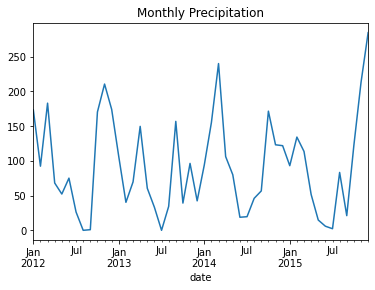

In [29]:
df.resample('M').precipitation.sum().plot(title='Monthly Precipitation')

#### Visualize the amount of wind over time. Choose a time interval you think is appropriate.

<AxesSubplot:title={'center':'Biweekly Average Wind'}, xlabel='date'>

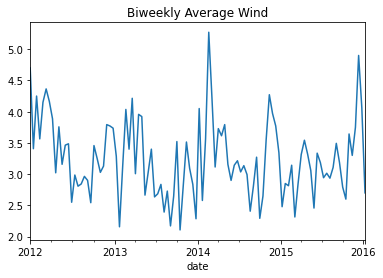

In [30]:
df.resample('2w').wind.mean().plot(title='Biweekly Average Wind')

#### Which year-month combination is the windiest?

In [31]:
df.groupby(['year', 'month']).sum()

precipitation  temp_max  temp_min   wind
year month                                           
2012 01-Jan          173.3     218.7      47.8  120.9
     02-Feb           92.3     269.0      92.9  113.2
     03-Mar          183.0     296.2      88.0  131.7
     04-Apr           68.1     446.2     179.8  101.2
     05-May           52.2     547.5     253.9  104.0
     06-Jun           75.1     560.8     314.4   92.5
     07-Jul           26.3     710.1     400.9   89.2
     08-Aug            0.0     801.6     434.3   87.7
     09-Sep            0.9     686.4     337.3   79.4
     10-Oct          170.3     490.7     259.8  109.5
     11-Nov          210.5     339.8     156.8   96.6
     12-Dec          174.0     224.3     102.1  118.8
2013 01-Jan          105.7     189.3      24.7   89.2
     02-Feb           40.3     265.1     121.1  101.7
     03-Mar           69.7     394.0     154.3  107.3
     04-Apr          149.6     427.3     200.9  111.4
     05-May           60.5     608.4     307.6   97.9
     06-Jun           33.1     697.6     394.9   90.1
     07-Jul            0.0     808.9     431.9   83.3
     08-Aug           34.4     809.7     479.9   78.8
     09-Sep          156.8     640.8     407.7   90.4
     10-Oct           39.2     441.1     236.8   70.5
     11-Nov           96.3     361.6     167.7   95.4
     12-Dec           42.4     217.7      48.7   84.8
2014 01-Jan           94.0     297.6     127.0  103.8
     02-Feb          155.2     229.6      73.8  126.8
     03-Mar          240.0     400.1     168.2  114.0
     04-Apr          106.1     463.8     201.9  110.9
     05-May           80.0     616.0     316.7   97.8
     06-Jun           18.8     647.7     352.7   95.7
     07-Jul           19.6     833.9     447.2   96.0
     08-Aug           46.0     817.9     461.7   76.8
     09-Sep           56.7     694.9     397.0   94.3
     10-Oct          171.5     556.8     337.4   90.4
     11-Nov          123.1     330.9     135.3  119.5
     12-Dec          121.8     314.3     142.9  110.5
2015 01-Jan           93.0     314.8     134.9   75.3
     02-Feb          134.2     350.5     170.4   86.2
     03-Mar          113.5     445.7     192.0   90.9
     04-Apr           51.6     465.1     180.9   99.4
     05-May           14.8     620.8     314.0   87.2
     06-Jun            5.9     781.9     407.3   97.4
     07-Jul            2.3     870.9     480.5   92.5
     08-Aug           83.3     808.7     455.5   97.8
     09-Sep           21.1     608.8     341.0   91.5
     10-Oct          122.4     543.7     325.5   94.1
     11-Nov          212.6     290.5     104.4  106.4
     12-Dec          284.5     259.8     118.6  134.6

In [32]:
df.groupby(['year', 'month']).sum().wind.idxmax()

(2015, '12-Dec')

#### What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [33]:
df['is_sunny'] = df.weather == 'sun'
# NB. previously we did a resample, could also group by date components
df.groupby(['year']).is_sunny.mean().sort_values()

year
2012    0.322404
2015    0.493151
2013    0.561644
2014    0.578082
Name: is_sunny, dtype: float64

#### In which month does it rain the most?

In [34]:
df.groupby('month').precipitation.sum().sort_values().tail()

month
01-Jan    466.0
10-Oct    503.4
03-Mar    606.2
12-Dec    622.7
11-Nov    642.5
Name: precipitation, dtype: float64

#### Which month has the most number of days with a non-zero amount of precipitation?

In [35]:
df['nonzero_precipitation'] = df.precipitation > 0
df.groupby('month').nonzero_precipitation.mean().sort_values().tail()

month
01-Jan    0.532258
03-Mar    0.588710
11-Nov    0.591667
02-Feb    0.646018
12-Dec    0.653226
Name: nonzero_precipitation, dtype: float64

## Flights

In [36]:
df = data.flights_20k()

In [37]:
df = df.sort_values(by='date').reset_index(drop=True)

In [38]:
df = df.set_index('date')
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,-8,251,MDW,STL
2001-01-01 07:00:00,-10,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


#### Convert any negative delays to 0.

In [39]:
pd.Series(range(1, 11)).clip(lower=3, upper=7)

0    3
1    3
2    3
3    4
4    5
5    6
6    7
7    7
8    7
9    7
dtype: int64

In [40]:
df.delay.clip(lower=0)

date
2001-01-01 00:01:00    14
2001-01-01 06:20:00     0
2001-01-01 06:30:00     0
2001-01-01 07:00:00     0
2001-01-01 07:00:00     0
                       ..
2001-03-31 21:02:00    26
2001-03-31 21:05:00     0
2001-03-31 21:05:00     0
2001-03-31 21:30:00    30
2001-03-31 21:30:00     0
Name: delay, Length: 20000, dtype: int64

In [41]:
# NB. pandas where and numpy where behave differently!
df.delay = np.where(df.delay < 0, 0, df.delay)

In [42]:
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,0,251,MDW,STL
2001-01-01 07:00:00,0,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


#### Which hour of the day has the highest average delay?

In [43]:
df['hour'] = df.index.hour

In [44]:
df.groupby('hour').delay.mean().sort_values().tail()

hour
22     32.704607
23     65.353846
0     127.916667
1     170.000000
3     302.500000
Name: delay, dtype: float64

#### Does the day of the week make a difference in the delay amount?

In [45]:
df['weekday'] = df.index.strftime('%w-%a')
df.groupby('weekday').delay.mean().sort_values()

weekday
1-Mon     7.165772
6-Sat     8.431498
2-Tue     9.410866
0-Sun    10.413542
3-Wed    11.032478
4-Thu    12.821322
5-Fri    17.757596
Name: delay, dtype: float64

#### Does the month make a difference in the delay amount?

In [46]:
df['month'] = df.index.month
df.groupby('month').delay.mean()

month
1    11.301592
2    12.306106
3     9.875287
Name: delay, dtype: float64

In [47]:
df['month'] = df.index.strftime('%m-%b')
df.groupby('month').delay.mean()

month
01-Jan    11.301592
02-Feb    12.306106
03-Mar     9.875287
Name: delay, dtype: float64

When creating features for weekday or month, prefer:

```python
df['weekday'] = df.index.strftime('%w-%a')
df['month'] = df.index.strftime('%m-%b')
```

instead of:

```python
df['weekday'] = df.index.day_name()
df['month'] = df.index.month
```

this allows us to see not just the number of the month / weekday, but also it's name. In addition, prefixing the name with the number allows the values to be sorted in the propert order for, e.g., visualizations.